In [1]:
###########################################################################################################################
# Task:               Maze solver                                                                                         #
# Algorithm:          A* algorithm                                                                                        # 
# Author:             Fatina Liliana Basmadji                                                                             #
# Last modification:  06.12.2023                                                                                          #
###########################################################################################################################

In [2]:
import numpy as np
import math
import random
from matplotlib import pyplot as plt
from matplotlib import colors

In [3]:
def init_maze():
    maze = [[0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0],
            [0,1,0,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,0],
            [0,1,0,1,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0],
            [0,1,1,1,0,1,1,1,0,1,1,1,1,1,1,1,1,1,0],
            [0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,1,0],     
            [0,1,0,1,1,1,0,1,1,1,1,1,1,1,0,1,0,1,0],
            [0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,1,0],            
            [0,1,1,1,0,1,1,1,1,1,1,1,0,1,0,1,1,1,0],            
            [0,0,0,1,0,1,0,0,0,0,0,1,0,1,0,1,0,1,0],  
            [0,1,1,1,0,1,0,1,1,1,0,1,0,1,0,1,0,1,0],
            [0,0,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0],
            [0,1,1,1,0,1,1,1,0,1,0,1,0,1,1,1,0,1,0],
            [0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0],
            [0,1,1,1,1,1,1,1,0,1,0,1,1,1,1,1,1,1,0],   
            [0,0,0,0,0,1,0,1,0,1,0,1,0,0,0,0,0,1,0],          
            [0,1,1,1,0,1,0,1,0,1,1,1,0,1,1,1,0,1,0],      
            [0,1,0,0,0,1,0,1,0,0,0,0,0,1,0,1,0,1,0],
            [0,1,1,1,1,1,0,1,1,1,1,1,1,1,0,1,0,1,1],
            [0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0]]
    return maze

In [4]:
my_maze = init_maze()
maze_rows = len(my_maze)
maze_columns = len(my_maze[0])

In [5]:
heuristic_function = 'euclidean'

In [6]:
def state_init():
    done = 0
    while done == 0:
        r_idx = random.randint(0, maze_rows-1)
        c_idx = random.randint(0, maze_columns-1)
        if my_maze[r_idx][c_idx] != 0:
            done = 1
    return r_idx,c_idx

In [7]:
def estimate(heuristic_function, node_1, node_2):
    if heuristic_function == 'euclidean':
        distance = math.sqrt ((node_1['position'][0] - node_2['position'][0])**2 +
                              (node_1['position'][1] - node_2['position'][1])**2 )
    return distance   

In [8]:
open_list = []
closed_list = []

In [9]:
start_node_r, start_node_c = state_init()
goal_node_r, goal_node_c = state_init()

start_node = {'position':(start_node_r, start_node_c), 'g':(0), 'h':(0), 'f':(0), 'parent_position':(0,0)}
goal_node = {'position':(goal_node_r, goal_node_c), 'g':(0), 'h':(0), 'f':(0), 'parent_position':(0,0)}

start_node['h'] = estimate(heuristic_function, start_node, goal_node)
start_node['f'] = start_node['g'] + start_node['h']

In [10]:
open_list.append(start_node)

while len(open_list) != 0:
    current_node = min(open_list, key=lambda x: x['f'])
    closed_list.append(current_node)
    open_list.remove(current_node)
    if current_node['position'] == goal_node['position']:
        print('The solution is found')
        break
    else:
        # Generate successor node
        for i in range(-1,2):
            for j in range(-1,2):
                if (i, j) != (0, 0) and (i,j) != (-1,-1) and (i,j) != (-1,1) and (i,j) != (1,-1) and (i,j) != (1,1):      
                    s_pos_r = current_node['position'][0] + i
                    s_pos_c = current_node['position'][1] + j  
                    if my_maze[s_pos_r][s_pos_c] == 0:
                        continue
                    successor_node = {'position':(s_pos_r, s_pos_c), 'g':(0), 'h':(0), 'f':(0), 
                                      'parent_position':(current_node['position'][0],current_node['position'][1])}   
                    successor_node['g'] = current_node['g'] + estimate(heuristic_function, current_node, successor_node)
                    successor_node['h'] = estimate(heuristic_function, successor_node, goal_node)
                    successor_node['f'] = successor_node['g'] + successor_node['h']

                    # Check if there is similar node in the open list
                    node_exists = False
                    for node in open_list:
                        if node['position'] == successor_node['position']:
                            node_exists = True
                            if node['f'] > successor_node['f']:
                                open_list.remove(node)
                                open_list.append(successor_node)
                            break                   
                    
                    # Check if there is similar node in the closed list
                    for node in closed_list:
                        if node['position'] == successor_node['position']:
                            if node['f'] > successor_node['f']:
                                closed_list.remove(node)
                            break  
                            
                    if node_exists == False:
                        open_list.append(successor_node)
                  
goal_node = current_node

The solution is found


In [11]:
solution = []
solution.append(goal_node['position'])
temp_node = goal_node

while(True):
    for node in closed_list:
        if node['position'] == temp_node['parent_position']:
            solution.append(node['position'])
            temp_node = node
            break
    if temp_node['position'] == start_node['position']:
        break
        
solution = np.array(solution)
solution = solution[::-1]

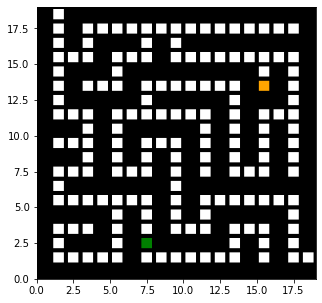

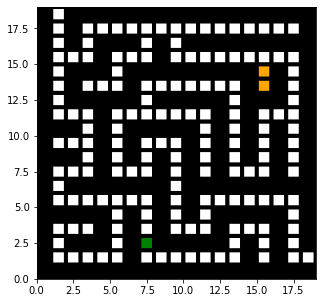

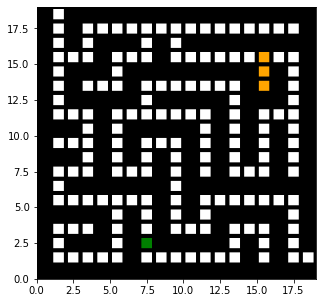

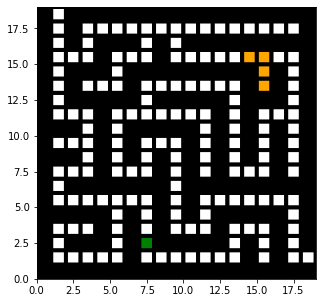

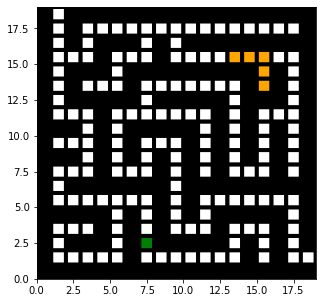

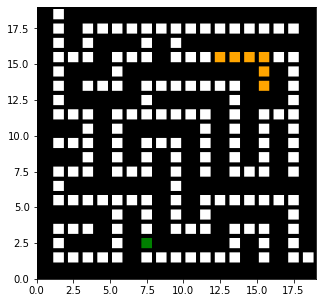

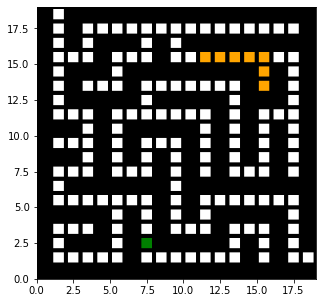

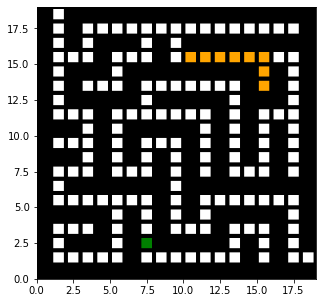

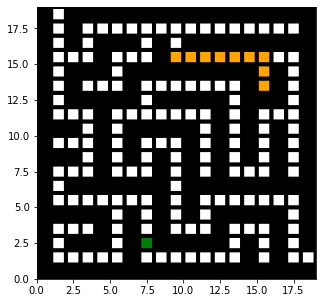

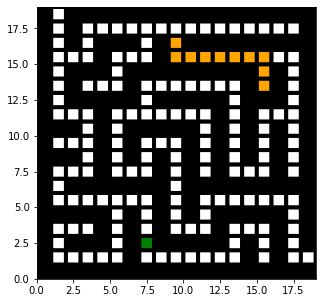

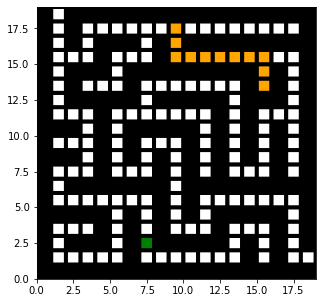

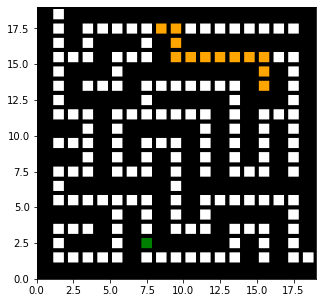

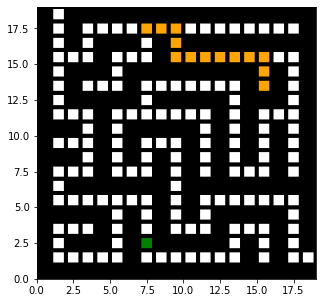

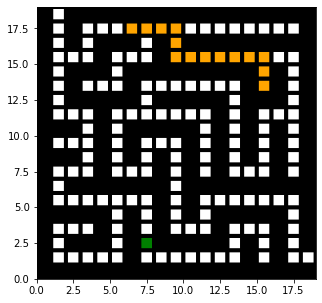

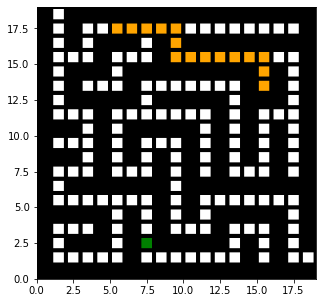

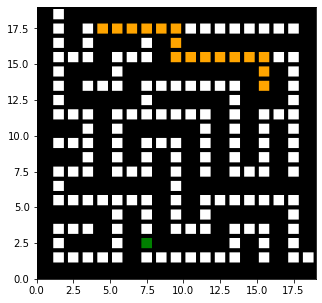

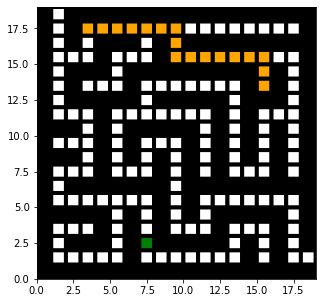

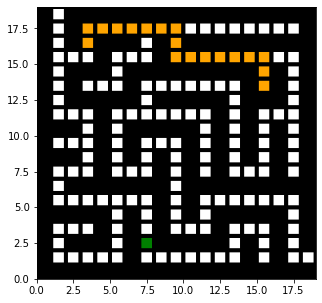

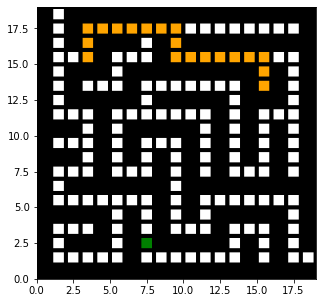

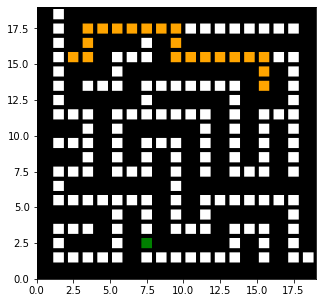

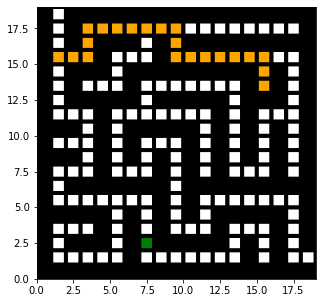

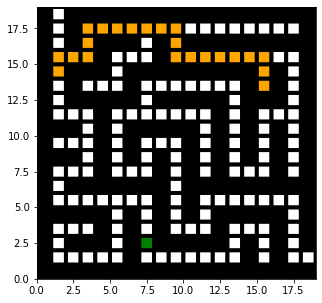

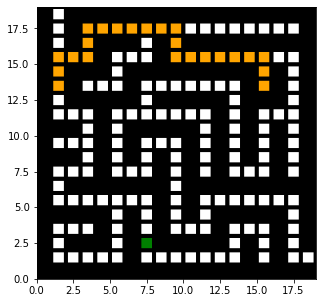

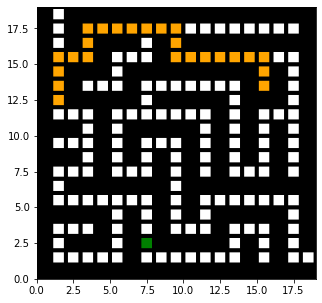

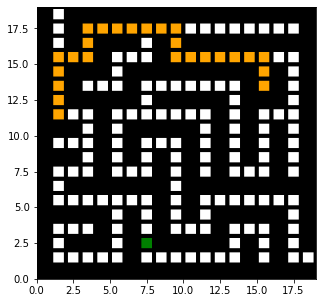

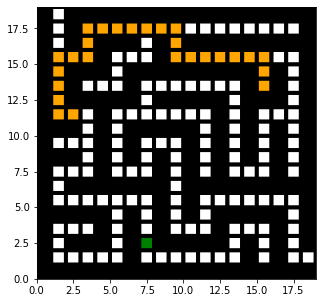

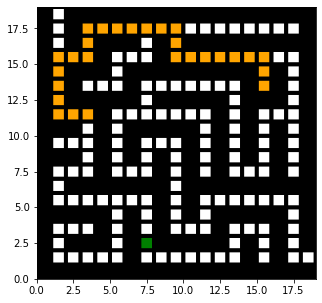

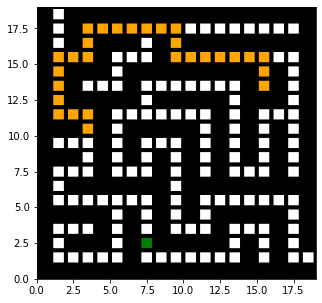

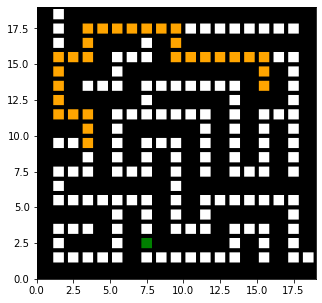

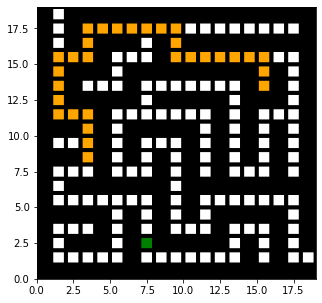

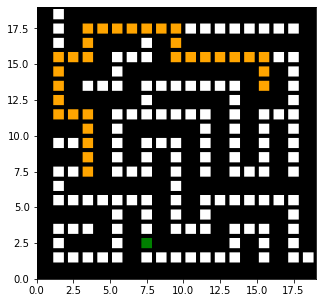

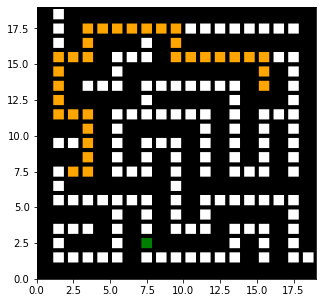

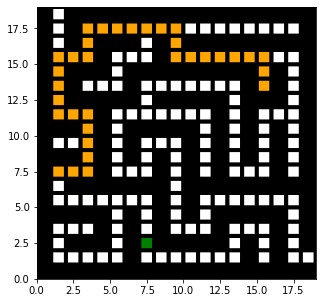

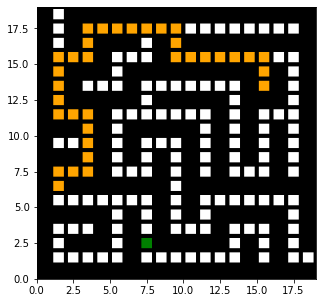

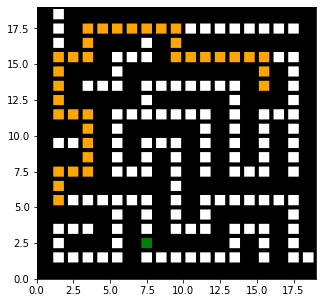

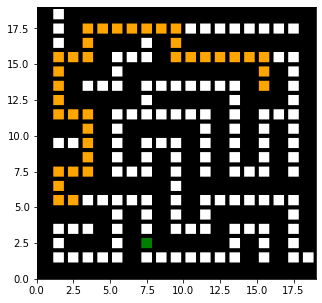

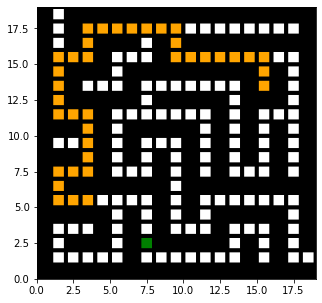

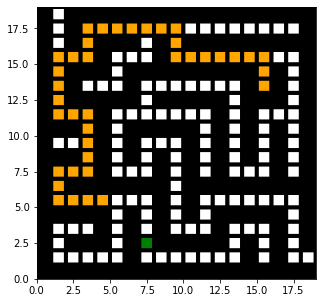

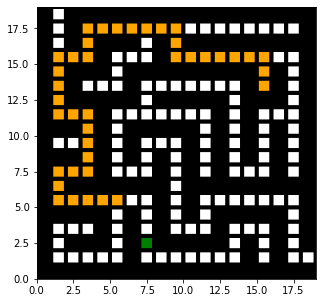

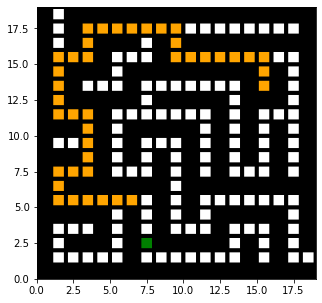

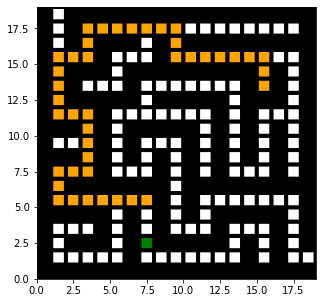

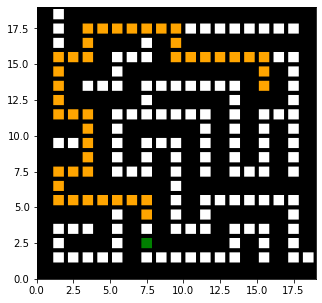

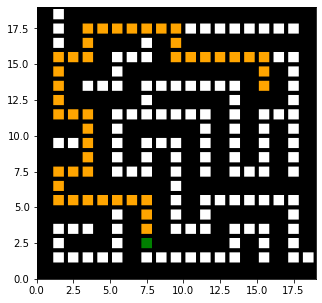

<Figure size 360x360 with 0 Axes>

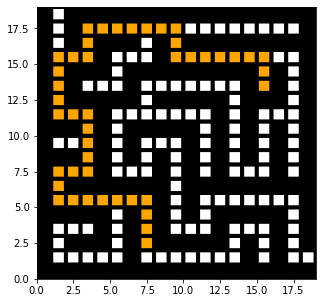


Success


In [12]:
# Visualization

my_maze = init_maze()
row_beg = start_node['position'][0]
column_beg = start_node['position'][1]
fstate_row = goal_node['position'][0]
fstate_column = goal_node['position'][1]

for s in range(len(solution)):   
    color_map = colors.ListedColormap(['black','white','green','orange'])
    plt.figure(figsize=(5,5))
    row_beg = solution[s,0]
    column_beg = solution[s,1]   
    if row_beg == fstate_row and column_beg == fstate_column:
        my_maze[row_beg][column_beg] = 3
        plt.figure(figsize=(5,5))
        plt.pcolor(my_maze[::-1],cmap=color_map,edgecolors='k', linewidths=4)
        plt.show()
        print('\nSuccess')
        break
    else:
        my_maze[row_beg][column_beg] = 3
        my_maze[fstate_row][fstate_column] = 2  
        plt.pcolor(my_maze[::-1],cmap=color_map,edgecolors='k', linewidths=4)
        plt.show()  
        